# 1. Import required libraries and read the dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [117]:
df = pd.read_csv('loan_approval_data.csv')


# 2. Check the first few samples, shape, info of the data and try to familiarize
# yourself with different features. (

In [118]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [119]:
df.shape

(614, 13)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [121]:
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [122]:
df.describe(include="O")

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


# 3. Check for missing values in the dataset, if present? handle them with
# appropriate methods and drop redundant features.

In [123]:
df.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [124]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)
df["married"].fillna(df["married"].mode()[0],inplace=True)
df["self_employed"].fillna(df["self_employed"].mode()[0],inplace=True)
df["dependents"].fillna(df["dependents"].mode()[0],inplace=True)
df["credit_history"].fillna(df["credit_history"].mode()[0],inplace=True)


df["loanamount"].fillna(df["loanamount"].mean(),inplace=True)
df["loan_amount_term"].fillna(df["loan_amount_term"].mean(),inplace=True)


In [125]:
df.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [126]:
#we can drop loan id column

df.drop("loan_id",axis=1,inplace=True)

# 4. Visualize the distribution of the target column 'loan_status' with respect to
# various categorical features and write your observations.

In [127]:
df_cat=df.select_dtypes(include="O")
df_cat

,gender,married,education,self_employed,property_area,loan_status
0,male,no,graduate,no,urban,y
1,male,yes,graduate,no,rural,n
2,male,yes,graduate,yes,urban,y
3,male,yes,not graduate,no,urban,y
4,male,no,graduate,no,urban,y
...,...,...,...,...,...,...
609,female,no,graduate,no,rural,y
610,male,yes,graduate,no,rural,y
611,male,yes,graduate,no,urban,y
612,male,yes,graduate,no,urban,y


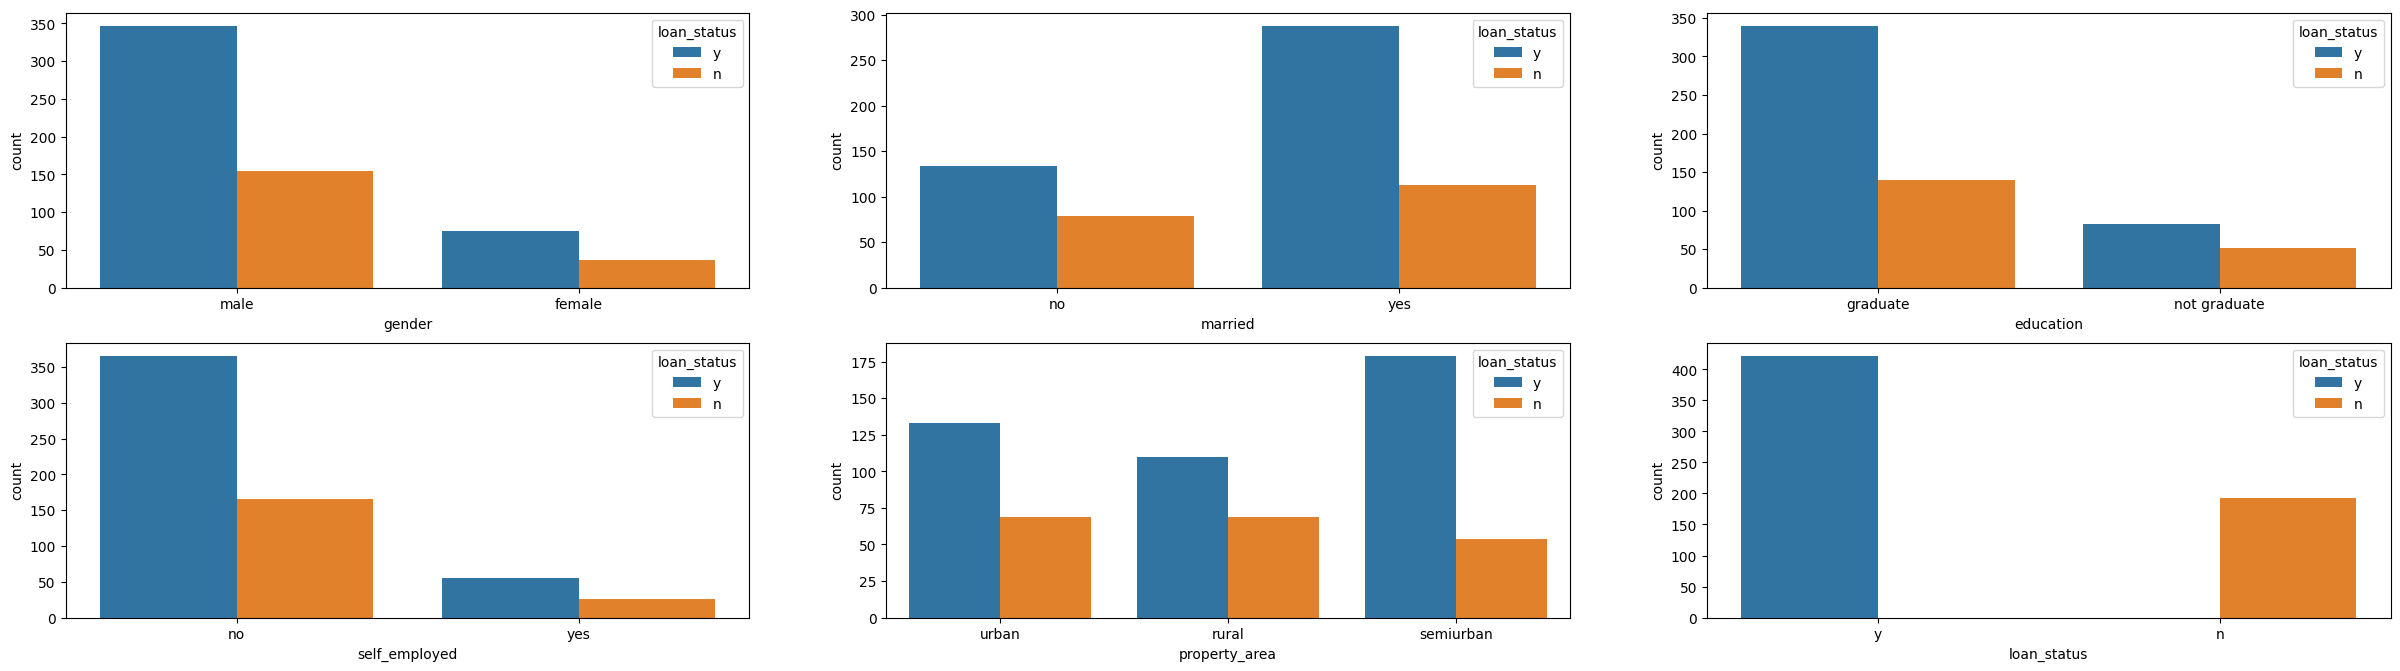

In [128]:
i=1
plt.figure(figsize=(30,25))
for feature in df_cat:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df_cat)
    i+=1

we can see from the chart that males tend to apply for loan more than females.
married persons have high chance of getting loans than unmaried persons
graduate have high chance of getting loans than ungraduates
the data is biased towards loan getting approved

# 5. Encode the categorical data.

In [129]:
categorial_col=["gender","married","education","self_employed","property_area","loan_status"]
le= LabelEncoder()

for i in categorial_col:
    df[i]=le.fit_transform(df[i])

In [130]:
df["credit_history"]=df["credit_history"].astype(int)
df["dependents"]=df["dependents"].astype(int)
df["coapplicantincome"]=df["coapplicantincome"].astype(int)
df["loanamount"]=df["loanamount"].astype(int)
df["loan_amount_term"]=df["loan_amount_term"].astype(int)

In [131]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


here 
male = 1 , female =0
married = 1 , not_married = 0
graduate =0 , not_graduate = 1
not_self=0 , self_emp =1
urban = 2 semi = 1 rural = 0 
approved =1 not_approved = 0

# 6. Separate the target and independent features and split the data into train
# and test.

In [132]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [133]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

print("shape of X_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of X_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of X_train (429, 11)
shape of y_train (429,)
shape of X_test (185, 11)
shape of y_test (185,)


# 7. Build any classification model to predict the loan status of the customer
# and save your model using pickle.

we will find best classifier based on accuracy 

In [134]:
# standardize
ss= StandardScaler()
x_train = ss.fit_transform(x_train) 
x_test = ss.transform(x_test)

In [135]:
 #RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [136]:
y_pred=rf_clf.predict(x_test)
print("accuracy of RandomForestClassifier is ", metrics.accuracy_score(y_pred,y_test))

accuracy of RandomForestClassifier is  0.7837837837837838


In [137]:
 #naive_bayes classifier

nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pred=nb_clf.predict(x_test)
print("accuracy of GaussianNB is ", metrics.accuracy_score(y_pred,y_test))

accuracy of GaussianNB is  0.8216216216216217


In [139]:
# decision tree classifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [140]:
y_pred=tree.predict(x_test)
print("decision tree classifier is ", metrics.accuracy_score(y_pred,y_test))

decision tree classifier is  0.7891891891891892


In [141]:
#KNeighborsClassifier
kkn=KNeighborsClassifier()
kkn.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
y_pred=kkn.predict(x_test)
print("decision KNeighborsClassifierr is ", metrics.accuracy_score(y_pred,y_test))

decision KNeighborsClassifierr is  0.7945945945945946


# We can see from above that naive bayes classifier has best accuracy so we use it for our prediction

In [143]:
import pickle
pickle.dump(nb_clf,open("model.pkl","wb"))